In [84]:
# pip install numpy_financial

In [ ]:
import numpy as np
import scipy.optimize as sc
import statsmodels.api as sm
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import plotly.express as px
import seaborn as sns
import warnings
from scipy import stats
import numpy_financial as npf
warnings.filterwarnings("ignore")

-----------------------

### Q1. DCF Valuation of Maruti
-----------

In [86]:
company_ticker = 'MARUTI.NS'

### Q1.1 Projecting cash flows for the planning period of 5 years

#### a) Download financial data (Income Statement, Balance Sheet, and Cash Flow)

In [87]:
company = yf.Ticker(company_ticker)
balance_sheet = company.balance_sheet.iloc[:, ::-1]
income_statement = company.financials.iloc[:, ::-1]
cash_flow = company.cashflow.iloc[:, ::-1]

In [88]:
balance_sheet = balance_sheet.drop(balance_sheet.columns[0], axis=1)
cash_flow = cash_flow.drop(cash_flow.columns[0], axis=1)

In [89]:
balance_sheet.head()

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Ordinary Shares Number,302080060.0,302080060.0,302080060.0,314402574.0
Share Issued,302080060.0,302080060.0,302080060.0,314402574.0
Net Debt,4535000000.0,3495000000.0,11785000000.0,NaN
Total Debt,5409000000.0,4255000000.0,12476000000.0,1186000000.0
Tangible Book Value,519789000000.0,546933000000.0,739634000000.0,849518000000.0


In [90]:
income_statement.head()

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Effect Of Unusual Items,4822201578.65063,2648316039.342587,3919982995.152421,8111382696.777526
Tax Rate For Calcs,0.175136,0.174082,0.208321,0.225906
Normalized EBITDA,56857000000.0,60915000000.0,136548000000.0,192833000000.0
Total Unusual Items,27534000000.0,15213000000.0,18817000000.0,35906000000.0
Total Unusual Items Excluding Goodwill,27534000000.0,15213000000.0,18817000000.0,35906000000.0


In [91]:
cash_flow.head()

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Free Cash Flow,64859000000.0,-16188000000.0,27498000000.0,76012000000.0
Capital Expenditure,-23703000000.0,-34593000000.0,-80648000000.0,-91999000000.0
End Cash Position,408000000.0,351000000.0,17852000000.0,26595000000.0
Other Cash Adjustment Outside Changein Cash,-30000000000.0,NaN,NaN,NaN
Beginning Cash Position,208000000.0,408000000.0,10050000000.0,17852000000.0


#### Common Sizing on Income Statement

Common Size Analysis, also known as Vertical Analysis, is a method of financial statement analysis that compares all items on the statement against one pre-determined item that acts as a base against which to evaluate all others. The formula for calculating this ratio is (Comparison Amount/Base Amount) * 100. It can be performed on the balance sheet, income statement, cash-flow statement, and statement of retained earnings, among others

#### Common Sizing on Income Statement (% of total revenue)

In [92]:
income_common_size = income_statement.div(income_statement.loc['Total Revenue'])

income_common_size

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Effect Of Unusual Items,0.007114,0.003109,0.003446,0.005943
Tax Rate For Calcs,0.0,0.0,0.0,0.0
Normalized EBITDA,0.083874,0.071523,0.120027,0.141286
Total Unusual Items,0.040617,0.017862,0.01654,0.026308
Total Unusual Items Excluding Goodwill,0.040617,0.017862,0.01654,0.026308
Net Income From Continuing Operation Net Minority Interest,0.064747,0.045551,0.072638,0.098826
Reconciled Depreciation,0.044758,0.032747,0.042597,0.038509
Reconciled Cost Of Revenue,0.802854,0.81522,0.795338,0.773801
EBITDA,0.124491,0.089385,0.136567,0.167594
EBIT,0.079733,0.056638,0.09397,0.129086


#### Common Sizing on Balance Sheet (as % of total assets)

In [93]:
balance_common_size = balance_sheet.div(balance_sheet.loc['Total Assets'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

balance_common_size

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Ordinary Shares Number,0.000423,0.000405,0.000301,0.000273
Share Issued,0.000423,0.000405,0.000301,0.000273
Net Debt,0.006354,0.004682,0.01174,NaN
Total Debt,0.007578,0.0057,0.012428,0.001028
Tangible Book Value,0.72824,0.732609,0.736794,0.736465
Invested Capital,0.742474,0.746336,0.755249,0.742683
Working Capital,0.026383,-0.003082,-0.070703,-0.028764
Net Tangible Assets,0.72824,0.732609,0.736794,0.736465
Capital Lease Obligations,0.000653,0.000548,0.000317,0.000741
Common Stock Equity,0.735549,0.741185,0.743138,0.742396


#### Plotting Key Ratios for Common Sizing on Income Statement

Gross Profit Margin, Net profit Margin, Interest Expense Ratio

In [94]:
income_ratios = pd.DataFrame({
    'Gross Profit Margin': income_common_size.loc['Gross Profit'],
    'Net Profit Margin': income_common_size.loc['Net Income'],
    'Interest Expense Ratio': income_common_size.loc['Interest Expense'],
}).T
income_ratios

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Gross Profit Margin,0.197146,0.18478,0.204662,0.226199
Net Profit Margin,0.064747,0.045551,0.072638,0.098826
Interest Expense Ratio,0.001239,0.001486,0.002218,0.001418


#### Plotting Key Ratios for Common Sizing on Balance Sheet

Current Asset Ratio, A/C Receivable Ratio, Current Liability Ratio

In [95]:
balance_ratios = pd.DataFrame({
    'Current Asset Ratio': balance_common_size.loc['Total Assets']-balance_common_size.loc['Total Non Current Assets'],
    'A/C Receivable Ratio': balance_common_size.loc['Accounts Receivable'],
    'Current Liability Ratio': balance_common_size.loc['Current Liabilities'],
    'PPE Ratio': balance_common_size.loc['Net PPE']
}).T

balance_ratios

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Current Asset Ratio,0.253544,0.224945,0.15609,0.196217
A/C Receivable Ratio,0.017932,0.027252,0.032722,0.039851
Current Liability Ratio,0.227161,0.228027,0.226793,0.224982
PPE Ratio,0.223657,0.2149,0.313266,0.302689


#### Plotting Income Statement Common Sizing Ratios

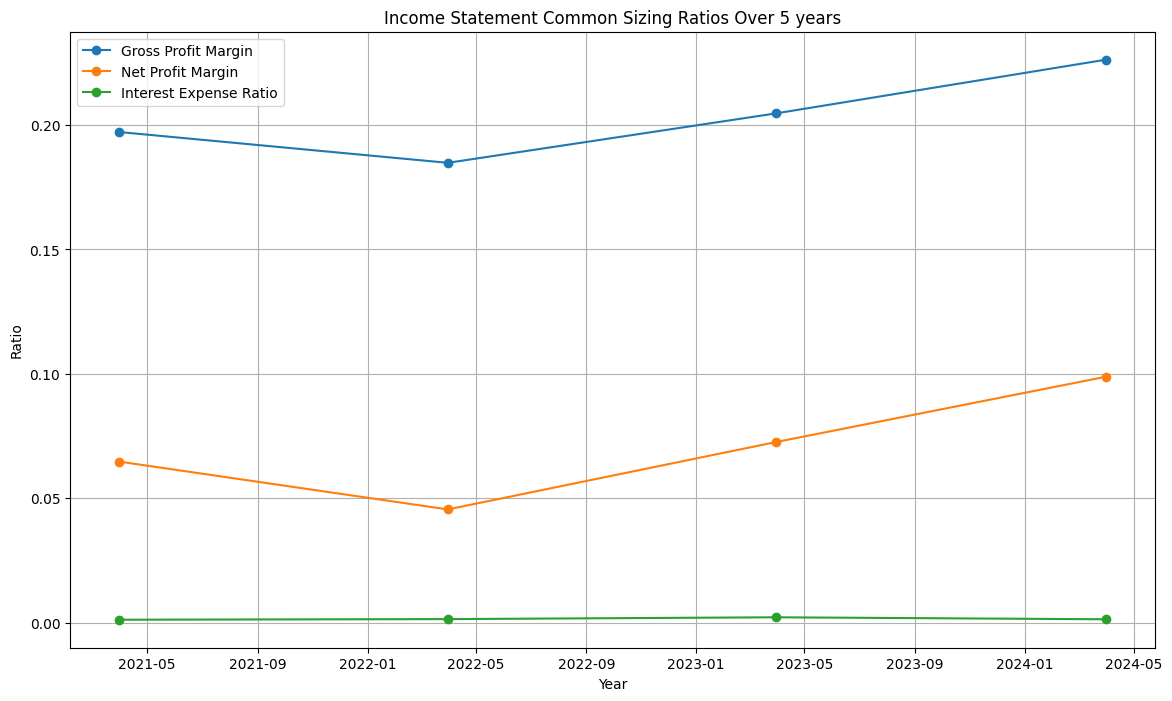

In [96]:
plt.figure(figsize=(14,8))

for ratio in income_ratios.index:
    plt.plot(income_ratios.columns,income_ratios.loc[ratio], marker='o', label=ratio)

plt.title('Income Statement Common Sizing Ratios Over 5 years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting Balance Sheet Common Sizing Ratios

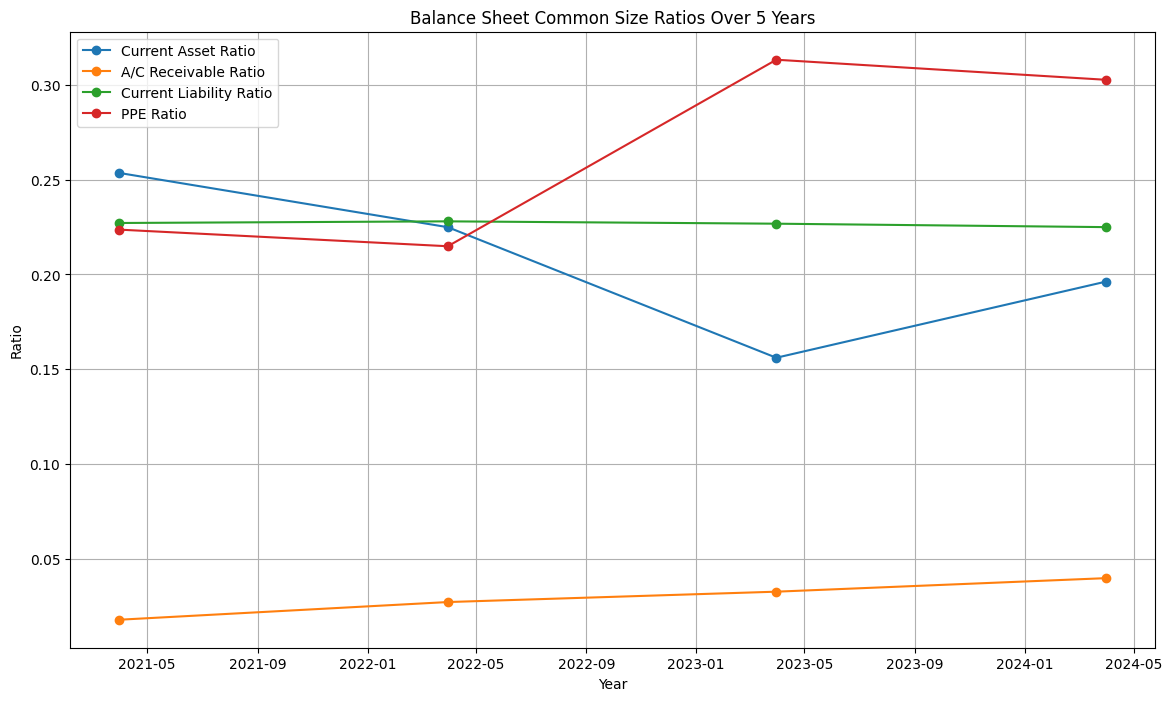

In [97]:
plt.figure(figsize=(14, 8))
for ratio in balance_ratios.index:
    plt.plot(balance_ratios.columns, balance_ratios.loc[ratio], marker='o', label=ratio)
plt.title('Balance Sheet Common Size Ratios Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()

### Horizontal Analysis of Income Statement and Balance Sheet

In [98]:
income_horizontal = income_statement.pct_change(axis='columns') * 100

In [99]:
income_horizontal.head()

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Effect Of Unusual Items,NaN,-45.080769,48.017946,106.923926
Tax Rate For Calcs,NaN,-0.601818,19.668317,8.441300
Normalized EBITDA,NaN,7.137204,124.161537,41.219937
Total Unusual Items,NaN,-44.748311,23.690265,90.816815
Total Unusual Items Excluding Goodwill,NaN,-44.748311,23.690265,90.816815


#### Plotting Horizontal Analysis Few Parametes

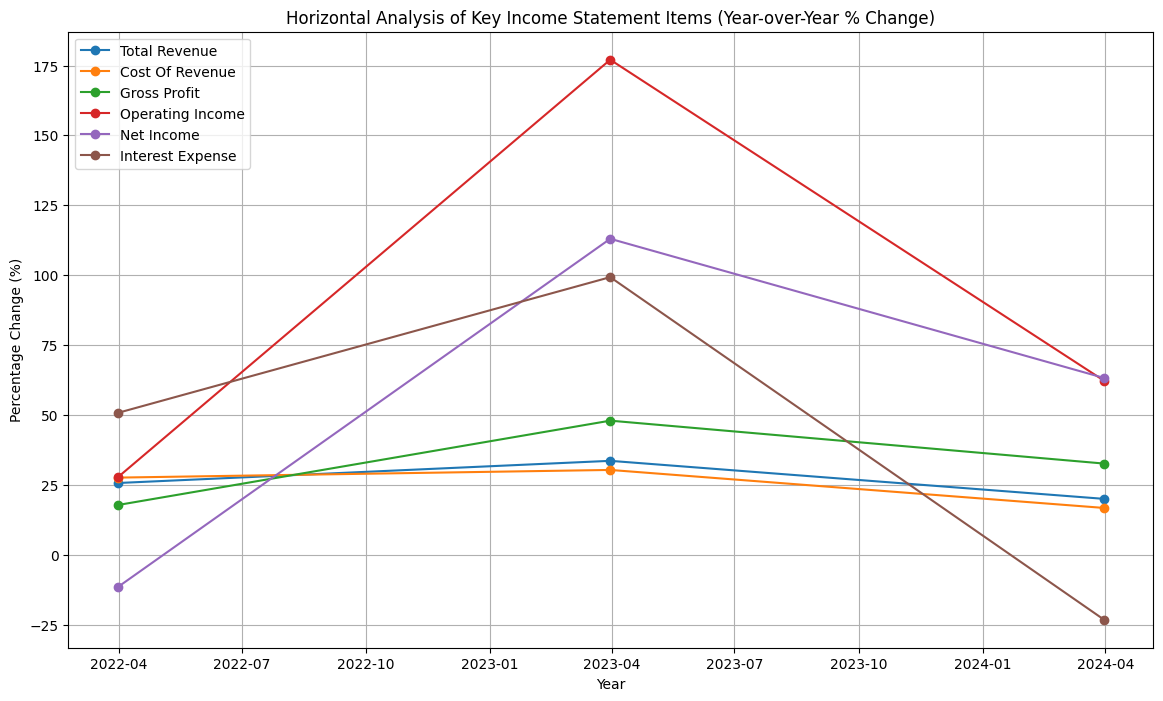

In [100]:
items_to_analyze = [
    'Total Revenue',
    'Cost Of Revenue',
    'Gross Profit',
    'Selling General Administrative Expense',
    'Operating Income',
    'Net Income',
    'Research Development',
    'Interest Expense'
]

plt.figure(figsize=(14, 8))

for item in items_to_analyze:
    if item in income_horizontal.index:
        plt.plot(income_horizontal.columns, income_horizontal.loc[item], marker='o', label=item)

plt.title('Horizontal Analysis of Key Income Statement Items (Year-over-Year % Change)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Shareholder's Equity Calculations

In [101]:
shareholders_equity = balance_sheet.loc['Total Assets'] - balance_sheet.loc['Total Liabilities Net Minority Interest']

In [102]:
balance_sheet.loc["Shareholder's Equity"] = shareholders_equity

#### Prospective Analysis

In [103]:
income_statement.head()

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Effect Of Unusual Items,4822201578.65063,2648316039.342587,3919982995.152421,8111382696.777526
Tax Rate For Calcs,0.175136,0.174082,0.208321,0.225906
Normalized EBITDA,56857000000.0,60915000000.0,136548000000.0,192833000000.0
Total Unusual Items,27534000000.0,15213000000.0,18817000000.0,35906000000.0
Total Unusual Items Excluding Goodwill,27534000000.0,15213000000.0,18817000000.0,35906000000.0


In [104]:
income_statement_items = [
    'Total Revenue', 'Cost Of Revenue', 'Gross Profit', 'Rent And Landing Fees',
    'Selling General And Administration', 'Depreciation And Amortization In Income Statement',
    'Net Non Operating Interest Income Expense', 'Other Non Operating Income Expenses',
    'Tax Provision', 'Tax Rate For Calcs'
]

filtered_income_statement = income_statement.loc[
    income_statement.index.intersection(income_statement_items)
]

print("Filtered Income Statement:")
filtered_income_statement


Filtered Income Statement:


,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Rate For Calcs,0.175136,0.174082,0.208321,0.225906
Tax Provision,9319000000.0,8177000000.0,21745000000.0,39363000000.0
Other Non Operating Income Expenses,405000000.0,437000000.0,277000000.0,766000000.0
Net Non Operating Interest Income Expense,-290000000.0,481000000.0,976000000.0,2032000000.0
Depreciation And Amortization In Income Statement,30341000000.0,27890000000.0,48460000000.0,52558000000.0
Selling General And Administration,32494000000.0,41408000000.0,53016000000.0,61393000000.0
Rent And Landing Fees,12982000000.0,17472000000.0,258000000.0,324000000.0
Gross Profit,133643000000.0,157375000000.0,232833000000.0,308725000000.0
Cost Of Revenue,544246000000.0,694313000000.0,904815000000.0,1056113000000.0
Total Revenue,677889000000.0,851688000000.0,1137648000000.0,1364838000000.0


In [105]:
# Defining EBITDA
filtered_income_statement.loc['EBITDA'] = filtered_income_statement.loc['Gross Profit'] - (
    filtered_income_statement.loc['Rent And Landing Fees'] + filtered_income_statement.loc['Selling General And Administration'])

# Defining EBIT
filtered_income_statement.loc['EBIT'] = filtered_income_statement.loc['EBITDA'] - filtered_income_statement.loc[
    'Depreciation And Amortization In Income Statement']

# Defining EBT
filtered_income_statement.loc['EBT'] = filtered_income_statement.loc['EBIT'] - filtered_income_statement.loc[
    'Net Non Operating Interest Income Expense'] - filtered_income_statement.loc['Other Non Operating Income Expenses']

# Defining Net Income
filtered_income_statement.loc['Net Income'] = filtered_income_statement.loc['EBIT'] - filtered_income_statement.loc[
    'Tax Provision']


In [106]:
filtered_income_statement.rename(index={'Depreciation And Amortization In Income Statement':'Depreciation & Amortization'},
                                 inplace=True)

filtered_income_statement.rename(index={'Selling General And Administration':'SG&A Expense'},
                                 inplace=True)

filtered_income_statement.rename(index={'Net Non Operating Interest Income Expense':'Interest Expense'},
                                 inplace=True)

filtered_income_statement.rename(index={'Cost Of Revenue':'COGS'},
                                 inplace=True)

filtered_income_statement.rename(index={'Tax Rate For Calcs':'Tax Rate'},
                                 inplace=True)

In [107]:
filtered_income_statement

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Rate,0.175136,0.174082,0.208321,0.225906
Tax Provision,9319000000.0,8177000000.0,21745000000.0,39363000000.0
Other Non Operating Income Expenses,405000000.0,437000000.0,277000000.0,766000000.0
Interest Expense,-290000000.0,481000000.0,976000000.0,2032000000.0
Depreciation & Amortization,30341000000.0,27890000000.0,48460000000.0,52558000000.0
SG&A Expense,32494000000.0,41408000000.0,53016000000.0,61393000000.0
Rent And Landing Fees,12982000000.0,17472000000.0,258000000.0,324000000.0
Gross Profit,133643000000.0,157375000000.0,232833000000.0,308725000000.0
COGS,544246000000.0,694313000000.0,904815000000.0,1056113000000.0
Total Revenue,677889000000.0,851688000000.0,1137648000000.0,1364838000000.0


In [108]:
avg_tax_rate = filtered_income_statement.mean(axis=1).loc['Tax Rate']

In [109]:
interest_EBIT_ratio = filtered_income_statement.loc['Interest Expense'] / (
    filtered_income_statement.loc['EBIT']
)

avg_interest_EBIT_ratio = interest_EBIT_ratio.mean()
avg_interest_EBIT_ratio

0.0049230615460744255

In [110]:
### Income statement Margins

gross_profit_margin = filtered_income_statement.loc['Gross Profit'] / filtered_income_statement.loc['Total Revenue']

sga_margin = filtered_income_statement.loc['SG&A Expense'] / filtered_income_statement.loc['Total Revenue']

cogs_margin = filtered_income_statement.loc['COGS'] / filtered_income_statement.loc['Total Revenue']

In [111]:
cash_flow.head()

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Free Cash Flow,64859000000.0,-16188000000.0,27498000000.0,76012000000.0
Capital Expenditure,-23703000000.0,-34593000000.0,-80648000000.0,-91999000000.0
End Cash Position,408000000.0,351000000.0,17852000000.0,26595000000.0
Other Cash Adjustment Outside Changein Cash,-30000000000.0,NaN,NaN,NaN
Beginning Cash Position,208000000.0,408000000.0,10050000000.0,17852000000.0


In [112]:
cash_flow_items = [
    'Change In Working Capital', 'Net PPE Purchase And Sale',
    'Capital Expenditure'
]

filtered_cash_flow_statement = cash_flow.loc[
    cash_flow.index.intersection(cash_flow_items)
]


In [113]:
filtered_cash_flow_statement.rename(index={'Change In Working Capital':'Change in WC'},
                                 inplace=True)

filtered_cash_flow_statement.rename(index={'Net PPE Purchase And Sale':'Net PPE'},
                                 inplace=True)

filtered_cash_flow_statement.rename(index={'Capital Expenditure	':'CAPEX'},
                                 inplace=True)

In [114]:
filtered_cash_flow_statement

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Capital Expenditure,-23703000000.0,-34593000000.0,-80648000000.0,-91999000000.0
Net PPE,-20900000000.0,-30703000000.0,-77254000000.0,-88716000000.0
Change in WC,43365000000.0,-28131000000.0,-972000000.0,17217000000.0


In [115]:
balance_sheet_items = ['Working Capital']

filtered_balance_sheet = balance_sheet.loc[
    balance_sheet.index.intersection(balance_sheet_items)
]

filtered_balance_sheet

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Working Capital,18831000000.0,-2301000000.0,-70975000000.0,-33180000000.0


In [116]:
### Margins

gross_profit_margin = filtered_income_statement.loc['Gross Profit'] / filtered_income_statement.loc['Total Revenue']

sga_margin = filtered_income_statement.loc['SG&A Expense'] / filtered_income_statement.loc['Total Revenue']

cogs_margin = filtered_income_statement.loc['COGS'] / filtered_income_statement.loc['Total Revenue']

ppe_sales_ratio = filtered_cash_flow_statement.loc['Net PPE'] / filtered_income_statement.loc['Total Revenue']

dna_ppe_ratio = filtered_income_statement.loc['Depreciation & Amortization']/filtered_cash_flow_statement.loc['Net PPE']

wc_sales_ratio = filtered_balance_sheet.loc['Working Capital']/ filtered_income_statement.loc['Total Revenue']



In [117]:
margin_ratios = pd.DataFrame({
    'Gross Profit Margin': filtered_income_statement.loc['Gross Profit'] / filtered_income_statement.loc['Total Revenue'],
    'SG&A to Sales': filtered_income_statement.loc['SG&A Expense'] / filtered_income_statement.loc['Total Revenue'],
    'COGS to Sales': filtered_income_statement.loc['COGS'] / filtered_income_statement.loc['Total Revenue'],
    'PPE to Sales': filtered_cash_flow_statement.loc['Net PPE'] / filtered_income_statement.loc['Total Revenue'],
    'D&A to PPE': filtered_income_statement.loc['Depreciation & Amortization']/filtered_cash_flow_statement.loc['Net PPE'],
    'WC to Sales': filtered_balance_sheet.loc['Working Capital']/ filtered_income_statement.loc['Total Revenue']

}).T


In [118]:
margin_ratios

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Gross Profit Margin,0.197146,0.18478,0.204662,0.226199
SG&A to Sales,0.047934,0.048619,0.046601,0.044982
COGS to Sales,0.802854,0.81522,0.795338,0.773801
PPE to Sales,-0.030831,-0.03605,-0.067907,-0.065001
D&A to PPE,-1.451722,-0.90838,-0.627281,-0.59243
WC to Sales,0.027779,-0.002702,-0.062387,-0.024311


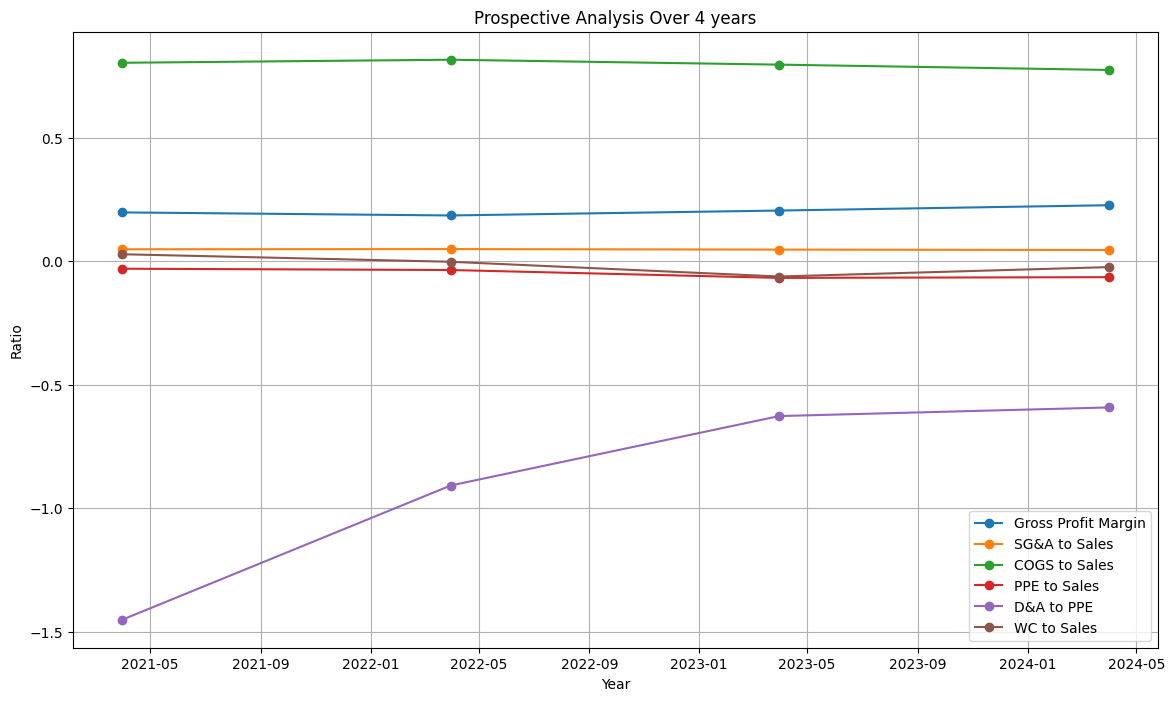

In [119]:
plt.figure(figsize=(14,8))

for ratio in margin_ratios.index:
    plt.plot(margin_ratios.columns,margin_ratios.loc[ratio], marker='o', label=ratio)

plt.title('Prospective Analysis Over 4 years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()

### Forecasting FCFF for 5 years

In [120]:
fcff_income = filtered_income_statement
fcff_cf = filtered_cash_flow_statement
fcff_cf

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Capital Expenditure,-23703000000.0,-34593000000.0,-80648000000.0,-91999000000.0
Net PPE,-20900000000.0,-30703000000.0,-77254000000.0,-88716000000.0
Change in WC,43365000000.0,-28131000000.0,-972000000.0,17217000000.0


In [121]:
fcff_income_horizontal = fcff_income.pct_change(axis='columns')
fcff_cf_horizontal = fcff_cf.pct_change(axis='columns')
fcff_cf_horizontal

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Capital Expenditure,NaN,0.459436,1.331339,0.140747
Net PPE,NaN,0.469043,1.516171,0.148368
Change in WC,NaN,-1.648703,-0.965447,-18.712963


In [122]:
fcff_income_average = fcff_income_horizontal.mean(axis=1)
gr_revenue = fcff_income_average['Total Revenue']
gr_revenue

0.26394697583477017

In [123]:
avg_margin_ratio = margin_ratios.mean(axis=1)
print('Avg ratios over last 3 years:')
avg_margin_ratio

Avg ratios over last 3 years:


,0
Gross Profit Margin,0.203197
SG&A to Sales,0.047034
COGS to Sales,0.796803
PPE to Sales,-0.049947
D&A to PPE,-0.894953
WC to Sales,-0.015405


In [124]:
fcff_data = {
    '2024-03-31': [filtered_income_statement.loc['Total Revenue','2024-03-31']],
    '2025-03-31': [(1+gr_revenue)*filtered_income_statement.loc['Total Revenue','2024-03-31']],
    '2026-03-31': [((1+gr_revenue)**2)*filtered_income_statement.loc['Total Revenue','2024-03-31']],
    '2027-03-31': [((1+gr_revenue)**3)*filtered_income_statement.loc['Total Revenue','2024-03-31']],
    '2028-03-31': [((1+gr_revenue)**4)*filtered_income_statement.loc['Total Revenue','2024-03-31']],
    '2029-03-31': [((1+gr_revenue)**5)*filtered_income_statement.loc['Total Revenue','2024-03-31']],
}

index = ['Total Revenue']

fcff_statement = pd.DataFrame(fcff_data, index=index)

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12


In [125]:
fcff_statement.loc['COGS'] = fcff_statement.loc['Total Revenue']*avg_margin_ratio['COGS to Sales']
fcff_statement.loc['SG&A'] = fcff_statement.loc['Total Revenue']*avg_margin_ratio['SG&A to Sales']
fcff_statement.loc['Net PPE'] = fcff_statement.loc['Total Revenue']*avg_margin_ratio['PPE to Sales']
fcff_statement.loc['D&A'] = fcff_statement.loc['Net PPE']*avg_margin_ratio['D&A to PPE']

fcff_statement


,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11


In [126]:
fcff_statement.loc['EBIT'] = fcff_statement.loc['Total Revenue'] - (
    fcff_statement.loc['COGS'] + fcff_statement.loc['SG&A']
    + fcff_statement.loc['Net PPE'] + fcff_statement.loc['D&A']
)

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11


In [127]:
fcff_statement.loc['Interest Expense'] = fcff_statement.loc['EBIT'] * avg_interest_EBIT_ratio
fcff_statement.loc['Tax'] = fcff_statement.loc['EBIT']*avg_tax_rate
fcff_statement.loc['EBIT(1-T)'] = fcff_statement.loc['EBIT'] - fcff_statement.loc['Tax']

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11


In [128]:
fcff_statement.loc['EBIT(1-T) + D&A'] = fcff_statement.loc['EBIT(1-T)'] + fcff_statement.loc['D&A']

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [129]:
fcff_statement.loc['Net WC'] = fcff_statement.loc['Total Revenue'] * avg_margin_ratio['WC to Sales']

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [130]:
fcff_statement.loc['Change in NWC'] = fcff_statement.loc['Net WC'].diff()
fcff_statement.loc['Capital Expenditure'] = fcff_statement.loc['Net PPE'].diff() + fcff_statement.loc['D&A']

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [131]:
fcff_statement.loc['FCFF'] = fcff_statement.loc['EBIT(1-T) + D&A'] - (
    fcff_statement.loc['Change in NWC'] + fcff_statement.loc['Capital Expenditure']
)

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [132]:
balance_sheet.loc['Interest Rate'] = income_statement.loc['Interest Expense']/balance_sheet.loc['Total Debt']

avg_interest_rate = balance_sheet.loc['Interest Rate'].iloc[0:-1].mean()

avg_interest_rate

0.21835244029801326

In [133]:
fcff_statement.loc['(EBIT-I)'] = (fcff_statement.loc['EBIT'] - fcff_statement.loc['Interest Expense'])
fcff_statement.loc['(EBIT-I)(1-T)'] = fcff_statement.loc['(EBIT-I)'] - fcff_statement.loc['Tax']

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [134]:
fcff_statement.loc['NP - P'] = (fcff_statement.loc['Interest Expense'] / avg_interest_rate) - (
    fcff_statement.loc['Interest Expense']
)

In [135]:
fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [136]:
fcff_statement.loc['FCFE'] = fcff_statement.loc['(EBIT-I)(1-T)'] + fcff_statement.loc['D&A'] - (
    fcff_statement.loc['Capital Expenditure'] + fcff_statement.loc['Change in NWC']
    + fcff_statement.loc['NP - P']
)

fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


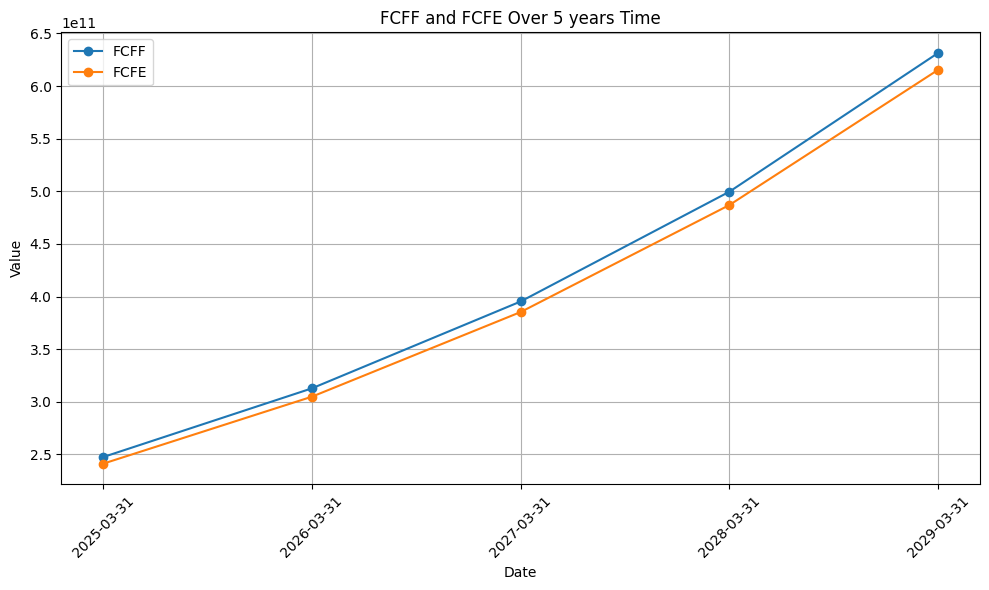

In [137]:
fcff_values = fcff_statement.loc['FCFF']
fcfe_values = fcff_statement.loc['FCFE']

dates = fcff_statement.columns

plt.figure(figsize=(10, 6))
plt.plot(dates, fcff_values, label='FCFF', marker='o')
plt.plot(dates, fcfe_values, label='FCFE', marker='o')


plt.title('FCFF and FCFE Over 5 years Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Terminal Growth Rate

In [138]:
# fcff_statement.loc['Net Income'] = fcff_statement.loc['EBIT'] - (
#     fcff_statement.loc['Interest Expense'] + fcff_statement.loc['Tax']
# )
# fcff_statement

In [139]:
dividend_payout_ratio = -(cash_flow.loc['Cash Dividends Paid'] / (
    income_statement.loc['Net Income']
)).mean()

dividend_payout_ratio

0.29606372730189423

In [140]:
reinvestment_rate = 1 -dividend_payout_ratio
reinvestment_rate

0.7039362726981058

In [141]:
ROE = (income_statement.loc['Net Income']/balance_sheet.loc["Shareholder's Equity"]).mean()
ROE

0.10549788359479863

In [142]:
growth_rate_term = reinvestment_rate * ROE
print(f"Terminal Growth rate is: {(growth_rate_term*100).round(7)}%")

Terminal Growth rate is: 7.4263787%


### Valuation of Firm using DCF

In [143]:
fcff_statement

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
Total Revenue,1.364838e+12,1.725083e+12,2.180413e+12,2.755927e+12,3.483345e+12,4.402764e+12
COGS,1.087507e+12,1.374552e+12,1.737361e+12,2.195932e+12,2.775541e+12,3.508137e+12
SG&A,6.419384e+10,8.113761e+10,1.025536e+11,1.296224e+11,1.638358e+11,2.070798e+11
Net PPE,-6.816973e+10,-8.616292e+10,-1.089054e+11,-1.376506e+11,-1.739831e+11,-2.199054e+11
D&A,6.100874e+10,7.711181e+10,9.746524e+10,1.231909e+11,1.557068e+11,1.968051e+11
EBIT,2.202977e+11,2.784446e+11,3.519392e+11,4.448325e+11,5.622447e+11,7.106475e+11
Interest Expense,1.084539e+09,1.370800e+09,1.732618e+09,2.189938e+09,2.767965e+09,3.498561e+09
Tax,4.314778e+10,5.453651e+10,6.893125e+10,8.712545e+10,1.101219e+11,1.391883e+11
EBIT(1-T),1.771499e+11,2.239081e+11,2.830080e+11,3.577070e+11,4.521227e+11,5.714592e+11
EBIT(1-T) + D&A,2.381586e+11,3.010199e+11,3.804732e+11,4.808979e+11,6.078295e+11,7.682643e+11


In [144]:
cost_of_cap = 0.12519182645

term_val = (fcff_statement.loc['FCFF'][-1]*growth_rate_term)/(
    cost_of_cap-growth_rate_term
)
print('Terminal Value of casflows is:',term_val)

pv_term_val = term_val/((1+cost_of_cap)**5)
print('Present Value of Terminal Value of cashflows is:',pv_term_val)



Terminal Value of casflows is: 920925824487.7773
Present Value of Terminal Value of cashflows is: 510612929875.6797


In [145]:
cash_flows = []

for i in range(5):
    cash_flows.append(fcff_statement.loc['FCFF'][1+i])

pv_cash_flows = npf.npv(cost_of_cap,cash_flows)
print('Present value of FCFFs (at t=0):', pv_cash_flows)

Present value of FCFFs (at t=0): 1582410878317.8403


In [146]:
total_val = pv_cash_flows + pv_term_val

print('Total Value of Firm (at t=0):',total_val)

Total Value of Firm (at t=0): 2093023808193.52


### COST OF EQUITY

In [147]:
def getReturns(stock_data):
    Returns=((stock_data-stock_data.shift(1))/stock_data.shift(1))
    Returns=Returns.dropna()
    return Returns

start_date='2019-05-01'
end_date='2024-10-31'
maruti_df = yf.download('MARUTI.NS', start=start_date, end=end_date, interval='1d', progress=False)
nifty_df = yf.download('^NSEI', start=start_date, end=end_date, interval='1d', progress=False)
maruti_df['Return_MARUTI']=getReturns(maruti_df['Adj Close'])
nifty_df['Return_NIFTY']=getReturns(nifty_df['Adj Close'])

In [148]:
maruti_df_returns = maruti_df['Return_MARUTI'].dropna()
nifty_df_returns = nifty_df['Return_NIFTY'].dropna()

returns = pd.merge(nifty_df_returns, maruti_df_returns, how='inner', on='Date')
x = returns['Return_NIFTY']
y = returns['Return_MARUTI']
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm)
results = model.fit()
beta_levered_maruti = results.params['Return_NIFTY'].round(5)
print('Beta(equity) of Maruti: ', beta_levered_maruti)

Beta(equity) of Maruti:  1.02309


In [149]:
#calculating expected annual market return based on 3 month nifty closing prices
start_date='2010-05-01'
end_date='2024-10-31'
annualnifty_df = yf.download('^NSEI', start=start_date, end=end_date, interval='3mo', progress=False)
annualnifty_df['Return_NIFTY']=getReturns(annualnifty_df['Adj Close'])

In [150]:
ret = annualnifty_df['Return_NIFTY'].dropna()
three_month_ret = ret.mean()
#convert the 3 month return to annual
annual_ret = (1+three_month_ret)**4 - 1
print(f"Three monthly return on nifty-{(three_month_ret*100)} %")
print(f"Effective annual return of market-{annual_ret*100} %")

Three monthly return on nifty-2.9891858498129227 %
Effective annual return of market-12.503620787983817 %


In [151]:
#As of 11th November, 2024, 10 year bond yield on Indian government bonds is 6.914%.
rf=0.06914

maruti_coe = (rf + beta_levered_maruti * (annual_ret - rf)).round(7)

print(f"The annual cost of Equity for Maruti Suzuki - {maruti_coe*100} %")

The annual cost of Equity for Maruti Suzuki - 12.632689999999998 %


### COST OF DEBT

cost of debt = risk free rate + default spread (obtained from credit rating)

Maruti Suzuki India Limited is AAA rated. Hence, its default spread is 0.75%.

In [152]:
maruti_cod = (rf+0.0075)
print(f"The annual cost of debt for Maruti Suzuki - {maruti_cod*100} %")

The annual cost of debt for Maruti Suzuki - 7.663999999999999 %


### COST OF CAPITAL

$$ Cost of Capital = R_s \cdot \left(\frac{E}{V}\right) + R_d \cdot \left(1 - T\right) \cdot \left(\frac{D}{V}\right) $$

Where:
- $R_s$ is the cost of equity.
- $ R_d$ is the cost of debt.
- $ E$ is the market value of equity.
- $ D$ is the market value of debt.
- $ V$ is the total value of the firm.
- $ T$ is the Corporate tax rate.

In [153]:
company = yf.Ticker('MARUTI.NS')
balance_sheet = company.balance_sheet.iloc[:, ::-1]

In [154]:
balance_sheet

,2020-03-31,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Ordinary Shares Number,NaN,302080060.0,302080060.0,302080060.0,314402574.0
Share Issued,NaN,302080060.0,302080060.0,302080060.0,314402574.0
Net Debt,932000000.0,4535000000.0,3495000000.0,11785000000.0,NaN
Total Debt,NaN,5409000000.0,4255000000.0,12476000000.0,1186000000.0
Tangible Book Value,NaN,519789000000.0,546933000000.0,739634000000.0,849518000000.0
Invested Capital,NaN,529949000000.0,557181000000.0,758160000000.0,856691000000.0
Working Capital,NaN,18831000000.0,-2301000000.0,-70975000000.0,-33180000000.0
Net Tangible Assets,NaN,519789000000.0,546933000000.0,739634000000.0,849518000000.0
Capital Lease Obligations,NaN,466000000.0,409000000.0,318000000.0,855000000.0
Common Stock Equity,NaN,525006000000.0,553335000000.0,746002000000.0,856360000000.0


In [155]:
income_statement = company.income_stmt.iloc[:, ::-1]

In [156]:
income_statement

,2021-03-31,2022-03-31,2023-03-31,2024-03-31
Tax Effect Of Unusual Items,4822201578.65063,2648316039.342587,3919982995.152421,8111382696.777526
Tax Rate For Calcs,0.175136,0.174082,0.208321,0.225906
Normalized EBITDA,56857000000.0,60915000000.0,136548000000.0,192833000000.0
Total Unusual Items,27534000000.0,15213000000.0,18817000000.0,35906000000.0
Total Unusual Items Excluding Goodwill,27534000000.0,15213000000.0,18817000000.0,35906000000.0
Net Income From Continuing Operation Net Minority Interest,43891000000.0,38795000000.0,82637000000.0,134882000000.0
Reconciled Depreciation,30341000000.0,27890000000.0,48460000000.0,52558000000.0
Reconciled Cost Of Revenue,544246000000.0,694313000000.0,904815000000.0,1056113000000.0
EBITDA,84391000000.0,76128000000.0,155365000000.0,228739000000.0
EBIT,54050000000.0,48238000000.0,106905000000.0,176181000000.0


In [157]:
bs=balance_sheet.transpose()
iss=income_statement.transpose()

In [158]:
df={
    'revenue' : iss['Total Revenue'],
  'book value' : bs['Total Debt'].dropna(),
  'interest expense' : iss['Interest Expense'].dropna()
}
df = pd.DataFrame(df)
print(df)

growth=((df['revenue']-df['revenue'].shift(1))/df['revenue'].shift(1))
growth=growth.dropna()

avggrowth = growth.mean()
print(f'\n The average growth rate in revenue: {avggrowth.round(7)*100}%')


debtbyrev=((df['book value'])/df['revenue'])
debtbyrev=debtbyrev.dropna()

debtbyrev = debtbyrev.mean()
print(f'\n The average debt by revenue percentage: {debtbyrev.round(7)*100}%')

ibyd=((df['interest expense'])/df['book value'])
ibyd=ibyd.dropna()

ibyd = ibyd.mean()
print(f'\n The average interest by debt percentage: {ibyd.round(7)*100}%')



                    revenue     book value interest expense
2021-03-31   677889000000.0   5409000000.0      840000000.0
2022-03-31   851688000000.0   4255000000.0     1266000000.0
2023-03-31  1137648000000.0  12476000000.0     2523000000.0
2024-03-31  1364838000000.0   1186000000.0     1936000000.0

 The average growth rate in revenue: 26.3947%

 The average debt by revenue percentage: 0.62026%

 The average interest by debt percentage: 57.18588%


In [159]:
revzero = df.loc['2024-03-31', 'revenue']
futurerev=[]
for i in range(5):
  revzero=revzero*(1+avggrowth)
  futurerev.append(revzero)

revzero = df.loc['2024-03-31', 'revenue']
futured=[]
for i in range(5):
  revzero=revzero*(1+avggrowth)
  futured.append(revzero*debtbyrev)

revzero = df.loc['2024-03-31', 'revenue']
futurei=[]
for i in range(5):
  revzero=revzero*(1+avggrowth)
  futurei.append(revzero*debtbyrev*ibyd)

df2={
  'Projected Year': ['2025-03-31' , '2026-03-31' , '2027-03-31' , '2028-03-31', '2028-03-31'],
  'Projected Revenue': futurerev,
  'Projected Book Value Debt': futured,
  'Projected Interest Expense': futurei
}


df2=pd.DataFrame(df2)
print(df2)

  Projected Year  Projected Revenue  Projected Book Value Debt  \
0     2025-03-31       1.725083e+12               1.070008e+10   
1     2026-03-31       2.180413e+12               1.352434e+10   
2     2027-03-31       2.755927e+12               1.709405e+10   
3     2028-03-31       3.483345e+12               2.160597e+10   
4     2028-03-31       4.402764e+12               2.730880e+10   

   Projected Interest Expense  
0                6.118937e+09  
1                7.734011e+09  
2                9.775380e+09  
3                1.235556e+10  
4                1.561678e+10  


In [160]:
interest = df2['Projected Interest Expense'].mean()
bookvalue=df2.loc[4, 'Projected Book Value Debt']
mvod = ((interest/maruti_cod)*(1-(1/(1+maruti_cod)**5)))+(bookvalue/((1+maruti_cod)**5))

print(f"The market value of debt for Maruti Suzuki India Limited is: {mvod}")

The market value of debt for Maruti Suzuki India Limited is: 60450537661.76161


In [161]:
#tax paid followed by MSIL = 22.25% as of Jun 2024
tax_rate = 0.2225

#market value of equity=market capitalization of MSIL = Rs.3,49,388Cr
#E and D values are in crores
E = 349388
# convert mvod into crores
D = mvod/10000000

rwacc=(((E/(E+D))*maruti_coe) + ((D/(E+D))*maruti_cod*(1-tax_rate)))

print(f"Cost of capital for Maruti Suzuki India Limited - {rwacc*100} %")

Cost of capital for Maruti Suzuki India Limited - 12.519182645368213 %


---
$$
\textbf{Relative Valuation of Maruti Suzuki Ltd.}
$$

---

$$
\small{
\text{This analysis assesses Maruti Suzuki's valuation by comparing its EV/EBITDA ratio to similar companies in the Indian} \\
\text{automotive sector. We first calculate an industry EV/EBITDA average as a benchmark and then analyze Maruti's} \\
\text{ratio in comparison to determine potential overvaluation or undervaluation.}
}
$$


In [162]:
# List of comparable companis in the Indian automotive sector
tickers = ["MARUTI.NS", "TATAMOTORS.NS", "HEROMOTOCO.NS", "HYUNDAI.NS", "M&M.NS", "BAJAJ-AUTO.NS"]

target_date = "2024-03-31"
ev_ebitda_ratios = []

for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info

    try:
        ev = info.get("enterpriseValue")
        ebitda = info.get("ebitda")
        ev_ebitda = info.get("enterpriseToEbitda")

        ev_ebitda_ratios.append({
            "Ticker": ticker,
            "Enterprise Value": ev,
            "EBITDA": ebitda,
            "EV/EBITDA Ratio": ev_ebitda
        })

    except KeyError as e:
        print(f"Data not available for {ticker}: {e}")
        ev_ebitda_ratios.append({
            "Ticker": ticker,
            "Enterprise Value": None,
            "EBITDA": None,
            "EV/EBITDA Ratio": None
        })

ev_ebitda_df = pd.DataFrame(ev_ebitda_ratios)
ev_ebitda_df.index += 1
ev_ebitda_df.style.set_caption(f"EV/EBITDA Ratios as of {target_date}") \
    .format({"Enterprise Value": "₹{:,.2f}", "EBITDA": "₹{:,.2f}", "EV/EBITDA Ratio": "{:.3f}"}) \
    .set_properties(**{'text-align': 'centre'})

,Ticker,Enterprise Value,EBITDA,EV/EBITDA Ratio
1,MARUTI.NS,"₹3,425,446,920,192.00","₹199,318,994,944.00",17.186
2,TATAMOTORS.NS,"₹3,300,050,337,792.00","₹485,882,986,496.00",6.792
3,HEROMOTOCO.NS,"₹878,117,191,680.00","₹54,042,251,264.00",16.249
4,HYUNDAI.NS,"₹1,357,513,621,504.00","₹93,010,239,488.00",14.595
5,M&M.NS,"₹4,133,995,675,648.00","₹268,166,807,552.00",15.416
6,BAJAJ-AUTO.NS,"₹2,617,528,287,232.00","₹111,616,999,424.00",23.451


In [163]:
from IPython.display import display, Markdown
all_multiples = [row["EV/EBITDA Ratio"] for row in ev_ebitda_ratios if row["Ticker"] in ["TATAMOTORS.NS", "HEROMOTOCO.NS", "HYUNDAI.NS", "M&M.NS", "BAJAJ-AUTO.NS"]]
overall_avg_multiple = sum(all_multiples) / len(all_multiples)

maruti_ev_ebitda = next(row["EV/EBITDA Ratio"] for row in ev_ebitda_ratios if row["Ticker"] == "MARUTI.NS")
percent_difference = ((maruti_ev_ebitda - overall_avg_multiple) / overall_avg_multiple) * 100

#print("Industry Average EV/EBITDA Multiple : {:.3f}".format(overall_avg_multiple))
print("Maruti Suzuki EV/EBITDA Multiple: {:.2f}".format(maruti_ev_ebitda))
display(Markdown(f"### Industry Average EV/EBITDA Multiple : {overall_avg_multiple:,.3f}"))
if percent_difference > 0:
    print("Maruti Suzuki's EV/EBITDA is {:.2f}% higher than the industry average.".format(percent_difference))
else:
    print("Maruti Suzuki's EV/EBITDA is {:.2f}% lower than the industry average.".format(abs(percent_difference)))


Maruti Suzuki EV/EBITDA Multiple: 17.19


### Industry Average EV/EBITDA Multiple : 15.301

Maruti Suzuki's EV/EBITDA is 12.32% higher than the industry average.


In [164]:
maruti_ebitda = next(row["EBITDA"] for row in ev_ebitda_ratios if row["Ticker"] == "MARUTI.NS")
maruti_ev = next(row["Enterprise Value"] for row in ev_ebitda_ratios if row["Ticker"] == "MARUTI.NS")

# New Estimated Enterprise Value using the industry average EV/EBITDA multiple
new_estimated_ev = overall_avg_multiple * maruti_ebitda
ev_difference_percent = ((maruti_ev - new_estimated_ev) / new_estimated_ev) * 100

print("Maruti Suzuki's Actual EV as on March 31, 2024: ₹{:,.2f}".format(maruti_ev))
print("Estimated EV based on Industry Multiple: ₹{:,.2f}".format(new_estimated_ev))
if ev_difference_percent > 0:
    print("Maruti Suzuki's Actual EV is {:.2f}% higher than the estimated EV.".format(ev_difference_percent))
else:
    print("Maruti Suzuki's Actual EV is {:.2f}% lower than the estimated EV".format(abs(ev_difference_percent)))

Maruti Suzuki's Actual EV as on March 31, 2024: ₹3,425,446,920,192.00
Estimated EV based on Industry Multiple: ₹3,049,700,214,040.17
Maruti Suzuki's Actual EV is 12.32% higher than the estimated EV.


In [165]:
from IPython.display import display, Markdown

fcff_statement.loc['EBITDA'] = fcff_statement.loc['EBIT'] + fcff_statement.loc['D&A']
display(Markdown("### EBITDA Projections from 2024 to 2029"))
display(fcff_statement.loc[['EBITDA']].style.format("₹{:,.2f}"))


maruti_ebitda_2029 = fcff_statement.loc['EBITDA', '2029-03-31']
display(Markdown(f"### EBITDA Projection for 2029 (Year 5): ₹{maruti_ebitda_2029:,.2f}"))

projected_ev_2029 = overall_avg_multiple * maruti_ebitda_2029
display(Markdown(f"### Estimated Enterprise Value (EV) for Maruti Suzuki in 2029 Based on Industry EV/EBITDA Multiple: ₹{projected_ev_2029:,.2f}"))


### EBITDA Projections from 2024 to 2029

,2024-03-31,2025-03-31,2026-03-31,2027-03-31,2028-03-31,2029-03-31
EBITDA,"₹281,306,424,535.07","₹355,556,404,574.00","₹449,404,442,299.99","₹568,023,385,771.78","₹717,951,440,649.67","₹907,452,552,205.36"


### EBITDA Projection for 2029 (Year 5): ₹907,452,552,205.36

### Estimated Enterprise Value (EV) for Maruti Suzuki in 2029 Based on Industry EV/EBITDA Multiple: ₹13,884,568,520,273.40

### Growth Rate Using Relative Valuation

At year 2029, the growth rate \(g\) can be calculated using the formula:

$$
g = \frac{ \big( \text{Industry Multiple} \cdot \text{EBITDA of MSIL} \cdot r \big) - \text{FCFF} }{ \big( \text{Industry Multiple} \cdot \text{EBITDA of MSIL} \big) + \text{FCFF} }
$$

**Where:**
- \(g\): Growth rate  
- \(r\): Discount rate or required rate of return  
- FCFF: Free Cash Flow to Firm  
- Industry Multiple: EV/EBITDA multiple for the industry  
- EBITDA of MSIL: Projected EBITDA for Maruti Suzuki Limited  


In [166]:
fcff5 = fcff_statement.loc['FCFF' , '2029-03-31']
ebitda5 = fcff_statement.loc['EBITDA' , '2029-03-31']
g = ((overall_avg_multiple*ebitda5*rwacc)-fcff5)/((overall_avg_multiple*ebitda5)+fcff5)

g_percentage = (g * 100).round(7)
display(Markdown(f"### Growth Rate of Maruti Suzuki India Limited"))
display(Markdown(f"Based on the relative valuation approach, the **calculated growth rate** is: **{g_percentage}%**"))

### Growth Rate of Maruti Suzuki India Limited

Based on the relative valuation approach, the **calculated growth rate** is: **7.6238668%**

---
